In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt


from pathlib import Path
from glob import glob

In [2]:
image_paths = glob('../data/train/i/*.png')


In [3]:
img1 = cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)

image_path2 = '../data/train/i/abf1f634-ce5d-11eb-b317-38f9d35ea60f.png'
image_path2 = '../data/train/i/abbd7b5c-ce5d-11eb-b317-38f9d35ea60f.png'
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

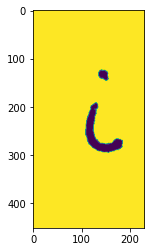

In [4]:
plt.imshow(img1)

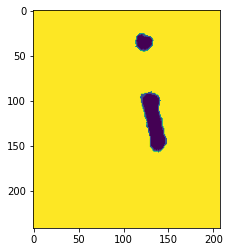

In [5]:
plt.imshow(img2)

In [6]:
surf = cv2.KAZE_create()

In [7]:
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)

In [8]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [9]:
# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

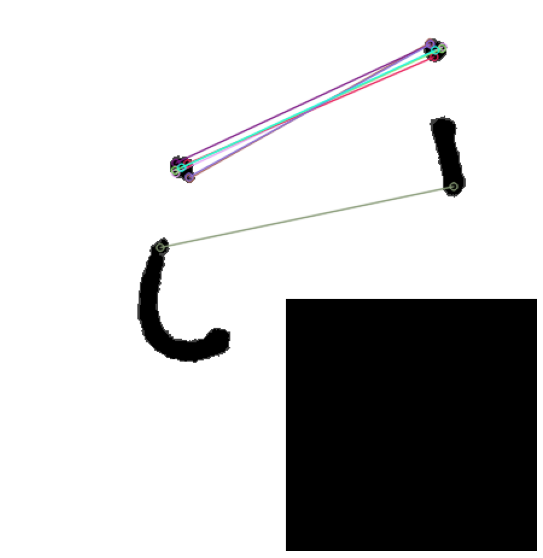

In [10]:
# if less then 10 points matched -> not the same images or higly distorted 
MIN_MATCH_COUNT = 10

src_pts = np.float32([kp1[m.queryIdx].pt for m in good
                        ]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good
                        ]).reshape(-1, 1, 2)

kp1_matched=([ kp1[m.queryIdx] for m in good ])
kp2_matched=([ kp2[m.trainIdx] for m in good ])   

matches = cv2.drawMatches(img1,kp1,img2,kp2, good,None, flags=2)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(matches)
plt.show()   

In [11]:
len(good)

8